In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [3]:
data= pd.read_csv('boston.csv')
data.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


In [4]:
data.shape

(506, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   INDUS   506 non-null    float64
 2   NOX     506 non-null    float64
 3   RM      506 non-null    float64
 4   AGE     506 non-null    float64
 5   DIS     506 non-null    float64
 6   TAX     506 non-null    int64  
 7   PT      506 non-null    float64
 8   B       506 non-null    float64
 9   MV      506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


In [6]:
data.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674030,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148862,2.105710,168.537116,2.164946,91.294863,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377487,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440002,21.200001
75%,3.677083,18.100000,0.624000,6.623500,94.074999,5.188425,666.000000,20.200001,396.225006,25.000000
max,88.976196,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.899994,50.000000


In [7]:
data.isnull().sum()

CRIM     0
INDUS    0
NOX      0
RM       0
AGE      0
DIS      0
TAX      0
PT       0
B        0
MV       0
dtype: int64

In [10]:
data.corr()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
CRIM,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,-0.388305
INDUS,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,-0.483725
NOX,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,-0.427321
RM,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355502,0.128069,0.695360
AGE,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,-0.376955
DIS,-0.379670,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,0.249929
TAX,0.582764,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,-0.468536
PT,0.289946,0.383248,0.188933,-0.355502,0.261515,-0.232471,0.460853,1.000000,-0.177383,-0.507787
B,-0.385064,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,0.333461
MV,-0.388305,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,1.000000


<AxesSubplot:>

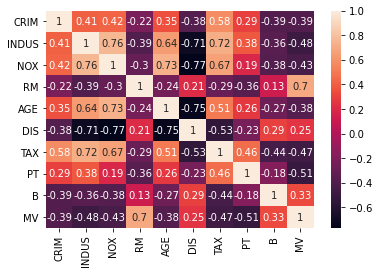

In [11]:
sns.heatmap(data.corr(),annot=True)

### Spliting data

In [13]:
x= data.drop('MV',axis=1)
x.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994


In [14]:
y= data['MV']

In [8]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain , xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=123)

### Adding intercept

In [16]:
xtrain= sm.add_constant(xtrain)
xtest= sm.add_constant(xtest)

### Fitting the model

In [25]:
model1= sm.OLS(ytrain, xtrain)

result1= model1.fit()

In [26]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     93.42
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.69e-92
Time:                        17:35:43   Log-Likelihood:                -1239.3
No. Observations:                 404   AIC:                             2499.
Df Residuals:                     394   BIC:                             2539.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4408      5.775      1.808      0.0

In [37]:
#Step1

xtrain2 = xtrain.drop('TAX',axis=1)
xtest2 = xtest.drop('TAX',axis=1)
xtrain2.head()
xtest2.head()

model2 = sm.OLS(ytrain ,xtrain2)
result2 = model2.fit()


print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     105.3
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.57e-93
Time:                        17:38:21   Log-Likelihood:                -1239.3
No. Observations:                 404   AIC:                             2497.
Df Residuals:                     395   BIC:                             2533.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1714      5.670      1.794      0.0

In [46]:

from sklearn.linear_model import LinearRegression

In [47]:
linreg= LinearRegression().fit(xtrain,ytrain)
linreg_prediction= linreg.predict(xtest)


mean_squared_error(ytest,linreg_prediction, squared = False)

5.9137137270155185

In [48]:
mean_absolute_error(ytest,linreg_prediction)

3.528627440239894